Создание моделей cifar-10 и cifar-100. Буду использоваться TensorFlow, matplotlib, numpy.\
Первый cлой — математическая часть
Первый слой сети, который смотрит на изображения, зависит от цветов. Если изображение цветное, он смотрит на три цвета: красный, зеленый и синий. Если черно-белое - только на один цвет.

Последний слой
Последний слой сети, который решает, к какому классу относится изображение, зависит от классов. Если имеется 100 классов, то в этом слое 100 “детекторов”, каждый из которых ищет свой класс. Если классов 20, то детекторов тоже 20.

In [11]:
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('always')

Также были использованы слои MaxPooling после каждого слоя свертки для уменьшения размерности. Были выбраны 64 нейрона для первого полносвязного слоя, что является достаточным для этой задачи. Наконец, была использована функция активации ReLU и оптимизатор Adam, которые являются стандартными выборами для таких задач. Количество эпох (20) было выбрано для баланса между временем обучения и производительностью модели. И определяет, сколько раз алгоритм обучения будет работать со всем набором обучающих данных.\

Полносвязные слои (Dense)- Слой, выходные нейроны которого связаны со всеми входными нейронами. Эти слои классифицируют изображения на основе признаков, извлеченных слоями свертки и подвыборки. Первый полносвязный слой имеет 64 нейрона, а выходной слой имеет столько нейронов, сколько классов в задаче (100 или 20).\
\
Выбраны следующие параметры:
1. MaxPulling - После каждого сверточного слоя используется слой максимального пулинга размером 2x2, что уменьшает размер карт признаков вдвое.
2. Были выбраны 64 нейрона для первого полносвязного слоя.
3. Выбран оптимизатор ADAM - алгоритм оптимизации, совмещающий принципы инерции MomentumSGD и адаптивного обновления параметров AdaGrad и его модификаций.



In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='fine')
train_images, test_images = train_images / 255.0, test_images / 255.0
model_100 = models.Sequential()
model_100.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_100.add(layers.MaxPooling2D((2, 2)))
model_100.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_100.add(layers.MaxPooling2D((2, 2)))
model_100.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_100.add(layers.Flatten())
model_100.add(layers.Dense(64, activation='relu'))
model_100.add(layers.Dense(100)) 
model_100.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_100 = model_100.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 4.0086 - accuracy: 0.0836 - val_loss: 3.6622 - val_accuracy: 0.1351
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 3.3819 - accuracy: 0.1845 - val_loss: 3.1963 - val_accuracy: 0.2231
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 3.0606 - accuracy: 0.2463 - val_loss: 3.0149 - val_accuracy: 0.2588
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.8602 - accuracy: 0.2847 - val_loss: 2.8305 - val_accuracy: 0.2928
Epoch 5/20
1563/1563 [==============================] - 16s 11ms/step - loss: 2.7177 - accuracy: 0.3118 - val_loss: 2.7640 - val_accuracy: 0.3089
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 2.6095 - accuracy: 0.3359 - val_loss: 2.7079 - val_accuracy: 0.3207
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 2.5155 - accuracy: 0.3560 - val_loss: 2.6465 - 

Создание модели для 20 широких классов:
Изменения будут касаться:
1. model_100.add(layers.Dense(100)) и model_20.add(layers.Dense(20))
2. datasets.cifar100.load_data(label_mode='fine') и datasets.cifar100.load_data(label_mode='coarse')
Количество эпох так же оставим 20.

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')
train_images, test_images = train_images / 255.0, test_images / 255.0
model_20 = models.Sequential()
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_20.add(layers.MaxPooling2D((2, 2)))
model_20.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_20.add(layers.MaxPooling2D((2, 2)))
model_20.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_20.add(layers.Flatten())
model_20.add(layers.Dense(64, activation='relu'))
model_20.add(layers.Dense(20))
model_20.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history_20 = model_20.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 2.4617 - accuracy: 0.2359 - val_loss: 2.2282 - val_accuracy: 0.3153
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0916 - accuracy: 0.3508 - val_loss: 2.0069 - val_accuracy: 0.3745
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.9033 - accuracy: 0.4060 - val_loss: 1.8958 - val_accuracy: 0.4121
Epoch 4/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7856 - accuracy: 0.4451 - val_loss: 1.7952 - val_accuracy: 0.4392
Epoch 5/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6935 - accuracy: 0.4690 - val_loss: 1.7586 - val_accuracy: 0.4563
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6181 - accuracy: 0.4952 - val_loss: 1.7131 - val_accuracy: 0.4647
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5544 - accuracy: 0.5119 - val_loss: 1.6949 - val_a

Произошло обучение моделей для 100 узких классов и для 20 широких. Теперь настало время их сравнить при помощи библиотеки matplotlib

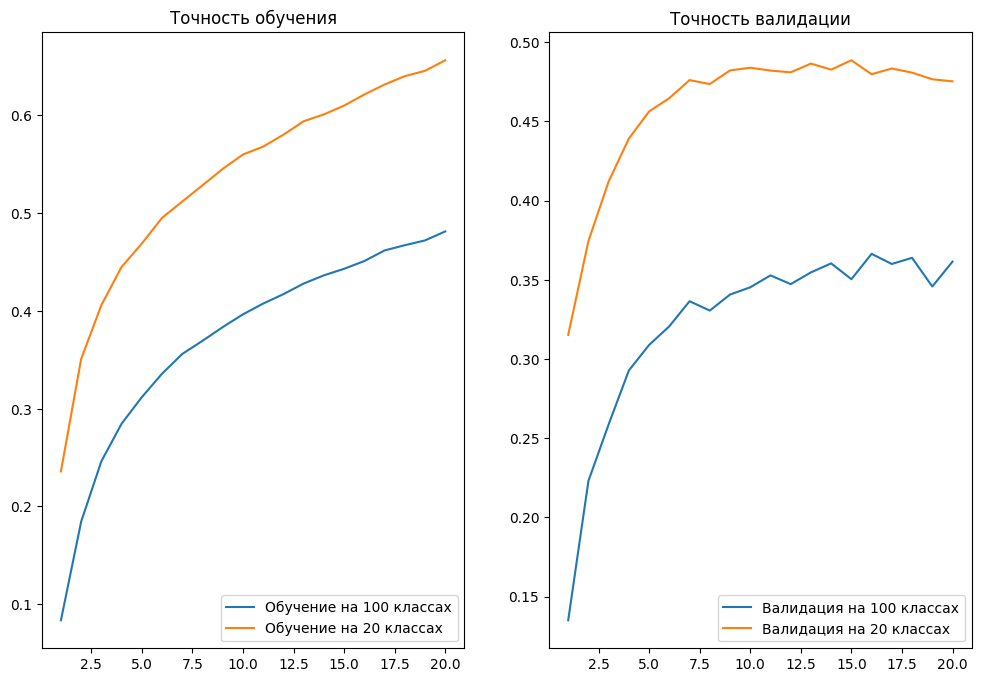

In [6]:
acc_100 = history_100.history['accuracy']
val_acc_100 = history_100.history['val_accuracy']
acc_20 = history_20.history['accuracy']
val_acc_20 = history_20.history['val_accuracy']
epochs_range = range(1, len(acc_100) + 1)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_100, label='Обучение на 100 классах')
plt.plot(epochs_range, acc_20, label='Обучение на 20 классах')
plt.legend(loc='lower right')
plt.title('Точность обучения')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_acc_100, label='Валидация на 100 классах')
plt.plot(epochs_range, val_acc_20, label='Валидация на 20 классах')
plt.legend(loc='lower right')
plt.title('Точность валидации')
plt.show()

Исходя из графиков видно, что при увечличении количества классов для более точного обучения и валидации необходимо намного больше данных. 


Вывод отчета о классификации для 100 классов

In [14]:
y_pred_100 = model_100.predict(test_images)
y_pred_labels_100 = np.argmax(y_pred_100, axis=1)
report_100 = classification_report(test_labels, y_pred_labels_100)
print("Отчет о классификации для 100 классов:\n", report_100)

313/313 [==============================] - 1s 3ms/step
Отчет о классификации для 100 классов:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.40      0.14      0.21       500
           2       0.07      0.01      0.02       500
           3       0.01      0.00      0.00       500
           4       0.02      0.00      0.01       500
           5       0.15      0.03      0.06       500
           6       0.02      0.01      0.01       500
           7       0.44      0.13      0.20       500
           8       0.03      0.01      0.01       500
           9       0.03      0.00      0.01       500
          10       0.00      0.00      0.00       500
          11       0.01      0.00      0.00       500
          12       0.02      0.00      0.01       500
          13       0.01      0.00      0.00       500
          14       0.00      0.00      0.00       500
          15       0.05      0.00      0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Вывод отчёта для 20 классов:

In [15]:
y_pred_20 = model_20.predict(test_images)
y_pred_labels_20 = np.argmax(y_pred_20, axis=1)
report_20 = classification_report(test_labels, y_pred_labels_20)
print("Отчет о классификации для 20 классов:\n", report_20)

313/313 [==============================] - 1s 3ms/step
Отчет о классификации для 20 классов:
               precision    recall  f1-score   support

           0       0.39      0.32      0.35       500
           1       0.50      0.44      0.47       500
           2       0.71      0.64      0.67       500
           3       0.48      0.48      0.48       500
           4       0.52      0.60      0.56       500
           5       0.49      0.27      0.35       500
           6       0.51      0.60      0.55       500
           7       0.43      0.55      0.49       500
           8       0.36      0.40      0.38       500
           9       0.52      0.67      0.59       500
          10       0.71      0.63      0.67       500
          11       0.37      0.47      0.41       500
          12       0.32      0.37      0.35       500
          13       0.32      0.22      0.26       500
          14       0.51      0.65      0.57       500
          15       0.29      0.22      0.

Выводы:

1. при увечличении количества классов для более точного обучения и валидации необходимо намного больше данных.
2. Посмотрев отчет 100 узких классов, точность равна 2%. Это очень низкий результат, модель плохо справляется с задачей классификации для 100 классов. Метрики для большинства классов крайне низки, что указывает на слабую способность модели корректно предсказывать классы. Вероятно, модель имеет трудности с обобщением и выделением паттернов для каждого класса. Необходимо увеличить количество данных датасета.
3. А посмотрев отчет 20 широких классов, точность - 48%. Это выше, чем для 100 классов и в целом, является удовлетворительным результатом.
4. Необходимо просматривать дисбаланс классов. Некоторые классы наиболее отличимы, нежели остальные.

In [16]:
model_100.save('100.keras')
model_20.save('20.keras')